# <span style="color:#008000"/>E-news Express Project

### Background
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective
Statistical analysis of business data. Explore the dataset and extract insights from the data.

### Key Questions
1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language?
5. Is the mean time spent on the new page same for the different language users?

### Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

In [1]:
# import warnings library to hide warning and deprecation messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data handling and numeric processing libraries
import pandas as pd
import numpy as np

In [3]:
# import visualizations and chart libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# command to display plots in the notebook
%matplotlib inline

In [5]:
# set styling options
sns.set_style('darkgrid')

In [6]:
# import statistical packages for inferential and hyothesis testing
import scipy.stats as stats
import statsmodels.stats.proportion as proportion

## <span style="color:#008000"/>1. Exploring the dataset and extract insights using Exploratory Data Analysis.

In [7]:
# importing the data set
data = pd.read_csv('abtest.csv')
# checking if data loaded correctly
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [8]:
# User ID is an identifier for each user it won't be used for analysis. Dropping user_id column
data = data.drop('user_id',1)

In [9]:
#confirming the new data
data.head()

,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,control,old,3.48,no,Spanish
1,treatment,new,7.13,yes,English
2,treatment,new,4.40,no,Spanish
3,control,old,3.02,no,French
4,treatment,new,4.75,yes,Spanish


### Understanding the data

In [10]:
# find rows and columns in the data
data.shape

(100, 5)

In [11]:
# basic data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   group                   100 non-null    object 
 1   landing_page            100 non-null    object 
 2   time_spent_on_the_page  100 non-null    float64
 3   converted               100 non-null    object 
 4   language_preferred      100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [12]:
# find if there are any missing values
data.isnull().sum()

group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

- There are 100 observations in the dataset
- There are 5 columns
- There are no missing valus
- group, landing_page, language_preferred and converted should be categorical variables

In [13]:
# convert object variables into categorical variables
data['group'] = data.group.astype('category')
data['landing_page'] = data.landing_page.astype('category')
data['language_preferred'] = data.language_preferred.astype('category')
data['converted'] = data.converted.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   group                   100 non-null    category
 1   landing_page            100 non-null    category
 2   time_spent_on_the_page  100 non-null    float64 
 3   converted               100 non-null    category
 4   language_preferred      100 non-null    category
dtypes: category(4), float64(1)
memory usage: 1.7 KB


Converting object variables into categorical helpped reduce memory usage

All the conversion is complete. We have 3 categorical columns and 2 numerical

### Summarizing the data

In [14]:
# get summary stats on the numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


- the average time spent on the page is 5.4 minutes
- the median for the data set is close to the mean 5.4 minutes
- with the mean and median almost equal, we can assume the time spent on the page fairly normalized

In [15]:
# get summary stats on the non-numerical variables
data.describe(exclude="number").T

,count,unique,top,freq
group,100,2,treatment,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


- there are 2 unique values for both group and landing page with equal frequency
- we need to find if both the category can be merged as one for analysis
- there are 3 language options for with top as Spanish

### Univariate Analysis

Analysis on the numerical variables

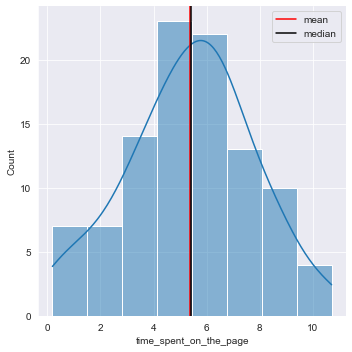

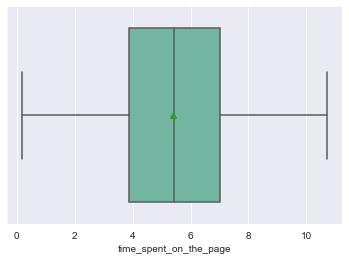

In [16]:
# Analysis on time spent on the ppage
variable = data['time_spent_on_the_page']

# Create histogram
sns.displot(variable,kde=True)

# Display mean and median in the histogram
mean = variable.mean()
median = variable.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.legend()
plt.show()

# Creating boxplot
sns.boxplot(variable,showmeans=True,palette="Set2")
plt.show()

- As previously determined, the time spent on the page is fairly normal distribubtion
- The mean and median lines almost overlap
- The kde is slight bumpy for data points 2 and 3 minutes but overall smooth distribution

Analysis on the categorical variables

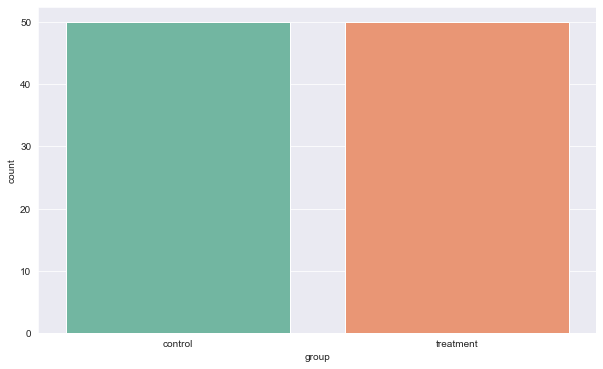

In [17]:
# Analysis on group
plt.figure(figsize=(10,6))
category = data['group']
sns.countplot(category,palette="Set2")
plt.show()

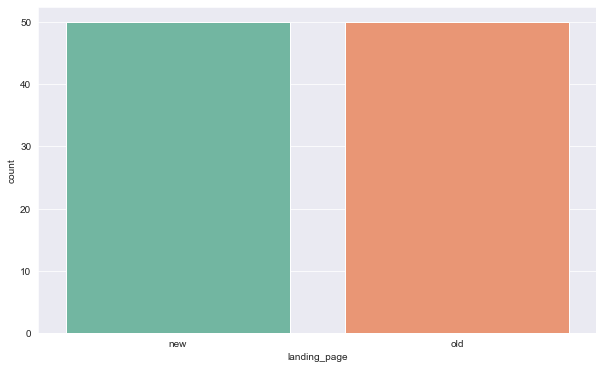

In [18]:
# Analysis on landing page
plt.figure(figsize=(10,6))
category = data['landing_page']
sns.countplot(category,palette="Set2")
plt.show()

From the distribution, it looks like the control group is new landing page and treatment is for old. Let's confirm that so we can use only one for analysis

In [19]:
data.groupby(['group', 'landing_page']).nunique()

time_spent_on_the_page  converted  language_preferred
group     landing_page                                                       
control   new                                0          0                   0
          old                               48          2                   3
treatment new                               48          2                   3
          old                                0          0                   0

Let's drop group column as it is mutually inclusive with landing page

In [20]:
data = data.drop('group',1)
data.head()

,landing_page,time_spent_on_the_page,converted,language_preferred
0,old,3.48,no,Spanish
1,new,7.13,yes,English
2,new,4.40,no,Spanish
3,old,3.02,no,French
4,new,4.75,yes,Spanish


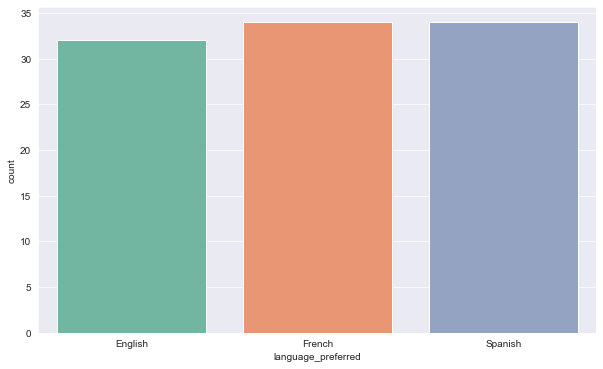

In [21]:
# Analysis on preferred language
plt.figure(figsize=(10,6))
category = data['language_preferred']
sns.countplot(category,palette="Set2")
plt.show()

- The 3 languages are English, French and Spanish
- All the languages have more than 30 users
- The top language is Spanish, followed by French and English

### Multivariate Analysis

Analyzing relations between categorical variables

In [22]:
# Checking landing page preference by language
pd.crosstab(index=data["landing_page"],columns=data["language_preferred"])

language_preferred,English,French,Spanish
landing_page,,,
new,16,17,17
old,16,17,17


Equal distribution accross languages for old and new landing page

In [23]:
# Checking conversion by landing page
pd.crosstab(index=data["landing_page"],columns=data["converted"])

converted,no,yes
landing_page,,
new,17,33
old,29,21


Observing the data, the new landing page has more conversions. We'll dig into this further in the analysis

In [24]:
# Checking conversion by landing page
pd.crosstab(index=data["language_preferred"],columns=data["converted"])

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


Overall English page has higher conversion

### Some additional analysis

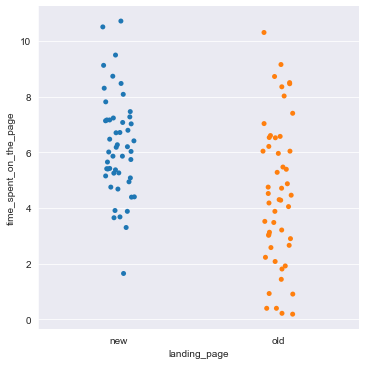

In [25]:
# categorical analysis Landing Page and Time Spent
sns.catplot(x="landing_page", y="time_spent_on_the_page", data=data)
plt.show()

Most of the users spend more than 3.5 minutes on the new landing page

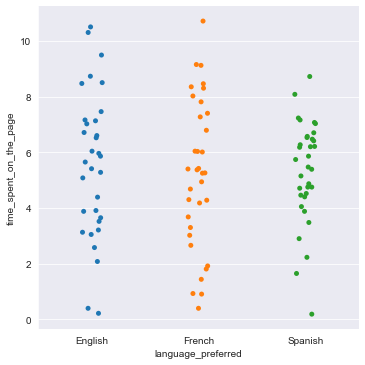

In [26]:
# categorical analysis Language and Time Spent
sns.catplot(x="language_preferred", y="time_spent_on_the_page", data=data)
plt.show()

- Not much variability between different languages
- Users don't spend more than 10 minutes on the Spanish page

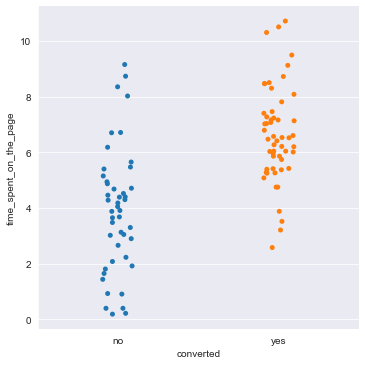

In [27]:
# categorical analysis Conversion and Time Spent
sns.catplot(x="converted", y="time_spent_on_the_page", data=data)
plt.show()

Users who convert spend at least 2 minutes on the page

## <span style="color:#008000"/>2. Do the users spend more time on the new landing page than the old landing page?

In [28]:
# Let's check mean time for each page
data.groupby(['landing_page']).mean()

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


It looks like average mean time spent on the page is higher for new landing page as compared to the old landing page

In [29]:
# Let's check mean time for each page
data.groupby(['landing_page']).median()

,time_spent_on_the_page
landing_page,
new,6.105
old,4.380


The median time spent on the page is greater than 1.7 minutes for new landing page as compared to the old

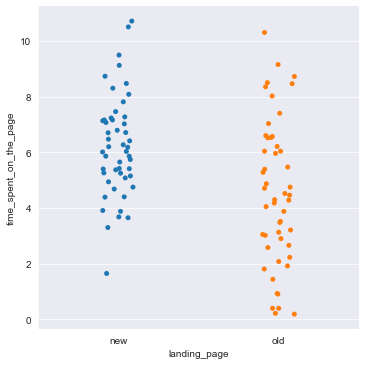

In [30]:
# Landing Page and Time Spent
sns.catplot(x="landing_page", y="time_spent_on_the_page", data=data)
plt.show()

- Time spent on new page is between 4-10 minutes
- There more users on the old page who abandon between 0-4 minutes

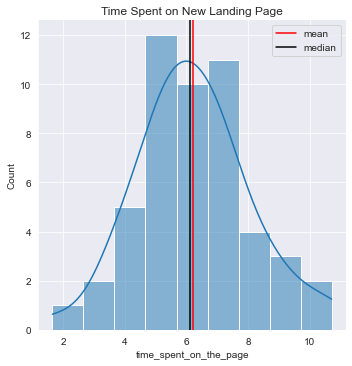

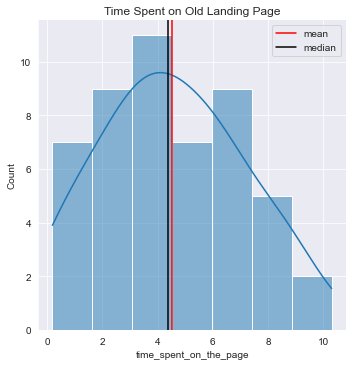

In [31]:
# Analysis on new landing page based on time spent on the page
data1 = data[data['landing_page']=='new']['time_spent_on_the_page']

# Create histogram
sns.displot(data1,kde=True)

# Display mean and median in the histogram
mean = data1.mean()
median = data1.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.title('Time Spent on New Landing Page')
plt.legend()
plt.show()

# Analysis on old landing page based on time spent on the page
data2 = data[data['landing_page']=='old']['time_spent_on_the_page']

# Create histogram
sns.displot(data2,kde=True)

# Display mean and median in the histogram
mean = data2.mean()
median = data2.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.title('Time Spent on Old Landing Page')
plt.legend()
plt.show()

In [32]:
data.groupby('landing_page')['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


- 75% of the users spent 7.16 minutes on the new landing page
- Overall the users spent more time on the new landing ppage

## Let's perform statistical test to check if users spent more time on the new page

### Let's write the null and alternative hypothesis
Let $\mu_1$ be the mean user time spent on new page
and $\mu_2$ be the mean user time spent on old page

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

For this test, we'll consider a significance level of 0.05

In [33]:
# Let's get data for new and old landing page separately
data_new_time = data[data['landing_page']=='new']['time_spent_on_the_page']
data_old_time = data[data['landing_page']=='old']['time_spent_on_the_page']

# Find the mean for the two landing pages
print('The mean time spent on the new landing page: ', (data_new_time.mean()))
print('The mean time spent on the old landing page: ', (data_old_time.mean()))

The mean time spent on the new landing page:  6.2232
The mean time spent on the old landing page:  4.532400000000001


### Let's determine the assumptions to select the test

* Continuous data - Yes, the usage time spent on page is on a continuous scale.
* Normally distributed populations - Yes, the graphs show that the time spent is normally distributed.
* Independent populations - As we are taking samples from two different groups, the two sets are from two independent populations.
* Equal population standard deviations - Assuming population standard deviation is equal.
* Random sampling from the population - Yes, the observations are randomly selected.

We can use two sample T-test for this problem.

### Let's find the p-value

In [34]:
# Find the p-value
test_stat, p_value = stats.ttest_ind(data_new_time, data_old_time, equal_var = True, alternative = 'greater')
print('The p-value is: ',p_value)

The p-value is:  0.0001316123528095005


In [35]:
0.05>0.0001316123528095005

True

Since p-value is way lower than the significace level 0.05 we reject the null hypothesis.
## Conclusion: users spent more time on the new page as compared to the old page

## <span style="color:#008000"/>3. Is the conversion rate for the new page greater than the conversion rate for the old page?

In [36]:
# Let's check how many users converted for both the landing page
pd.crosstab(index=data["landing_page"],columns=data["converted"])

converted,no,yes
landing_page,,
new,17,33
old,29,21


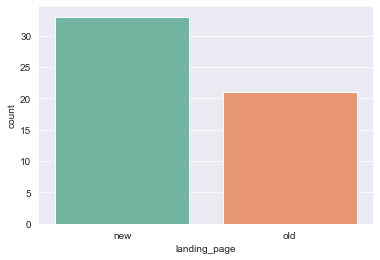

In [37]:
# Checking conversion by landing page
data_converted = data[data['converted']=='yes']['landing_page']

# Plot number of conversions per landing page
sns.countplot(data_converted,palette="Set2")
plt.show()

For the sample observations, there are more users who converted from the new landing page

### Let's perform a statistical test to check whether the new page has more conversions

Based on the table above, for the new landing page 33 out of 50 users converted and for the old landing page 21 out of 50 users converted.

### Let's write the null and alternative hypothesis
Let $p_1$ be the proportions of conversions from the new landing page 
and $p_2$ be the proportions of conversions from the old landing page

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Let's test whether the Z-test assumptions are satisfied

*   Binomally distributed population - Yes, an user can either convert or not convert.
*   Random sampling from the population - Yes, the observations are randomly selected.  
*   Can the binomial distribution approximated to normal distribution - Let's check whether np and n(1-p) are greater than or equal to 10. n is the sample size and p refers to the sample proportion.

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

All the values are greater than 10. We can use the Z-test proportion test

In [38]:
# Let's check p-value for the proportion Z-test

# Get the converted user count by page
new_convert = (data[data['converted']=='yes']['landing_page']=='new').sum()
old_convert = (data[data['converted']=='yes']['landing_page']=='old').sum()

# Get all the observations by page
new_samples = (data['landing_page']=='new').sum()
old_samples = (data['landing_page']=='old').sum()

# Set the converted
convert_count = np.array([new_convert, old_convert])

# Set the sample sizes
num_obs = np.array([new_samples, old_samples])

# find the p-value
test_stat, p_value = proportion.proportions_ztest(convert_count, num_obs)
print('The p-value is: ',p_value)

The p-value is:  0.016052616408112556


In [39]:
0.05>0.016052616408112556

True

Since p-value is lower than the significace level 0.05 we reject the null hypothesis.
## Conclusion: the conversion rate for the new page is greater than the conversion rate for the old page

## <span style="color:#008000"/>4. Does the converted status depend on the preferred language?

In [40]:
# Let's check how many users converted for both the landing page
pd.crosstab(index=data["language_preferred"],columns=data["converted"],margins=True)

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


- The users whose preferred language is English have highest conversions
- The next language with better conversions is Spanish
- French has least number of conversions in the sample observations

In [41]:
# Let's check conversion percentage distribution for each language
pd.crosstab(index=data["language_preferred"],columns=data["converted"]).apply(lambda r: r/r.sum(), axis=1)

converted,no,yes
language_preferred,,
English,0.343750,0.656250
French,0.558824,0.441176
Spanish,0.470588,0.529412


- Overall English page preferred users have higher percent conversion
- Spanish page users the are almost at even split for successful and unsuccesful conversion
- French page users lower percentage of conversion

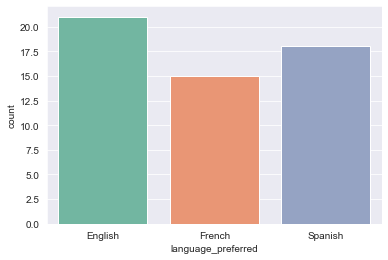

In [42]:
# Checking conversion by landing page language
data_converted_lang = data[data['converted']=='yes']['language_preferred']

# Plot number of conversions per landing page
sns.countplot(data_converted_lang,palette="Set2")
plt.show()

Here we can see the the ranking by counts - English, Spanish and French

### Let's perform a statistical test to check whether the conversions depend on preferred language

### Let's write the null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ Conversion is independent of landing page language preference

against the alternate hypothesis

>$H_a:$ Conversion depends on landing page language preference

### Let's test whether the assumptions are satisfied

- Categorical variables - Yes, the variables are categorical.
- Expected value of the number of sample observations is at least 5 - Yes, the number of observations for each age greater than 5.
- Random sampling from the population - Yes, the observations are randomly selected. 

We can use Chi-Square test for independence

In [43]:
# Let's prepare the data for the test
lang_data = pd.crosstab(index=data["language_preferred"],columns=data["converted"])
lang_data

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [44]:
# Let's check p-value for Chi-Square test for independence
chi, p_value, dof, expected = stats.chi2_contingency(lang_data)
print('The p-value is: ', p_value)

The p-value is:  0.2129888748754345


In [45]:
0.05<0.2129888748754345

True

Since p-value is higher than the significace level 0.05 we fail to reject the null hypothesis.
## Conclusion: Conversion is independent of landing page language preference

## <span style="color:#008000"/>5. Is the mean time spent on the new page same for the different language users?

In [46]:
data_new = data.loc[data['landing_page'] == 'new']
data_new.head()

,landing_page,time_spent_on_the_page,converted,language_preferred
1,new,7.13,yes,English
2,new,4.40,no,Spanish
4,new,4.75,yes,Spanish
6,new,5.25,yes,French
8,new,10.71,yes,French


In [47]:
# Let's check the mean time spent for different languages
data_new.groupby(['language_preferred']).mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


- The average time spent for all the 3 language pages falls above 5.8 minutes
- English language have highest mean time on the new page
- Spanish language have lowest mean time on the new page

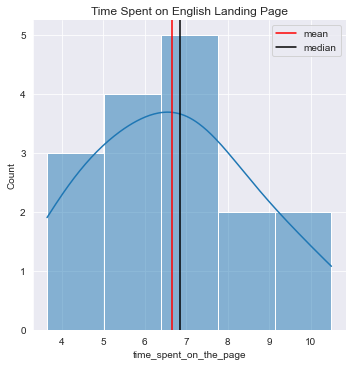

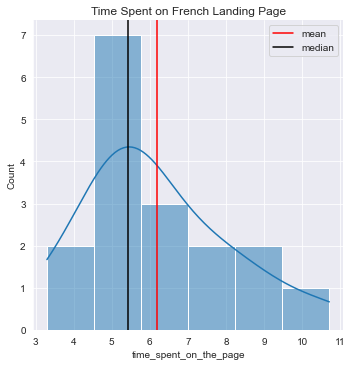

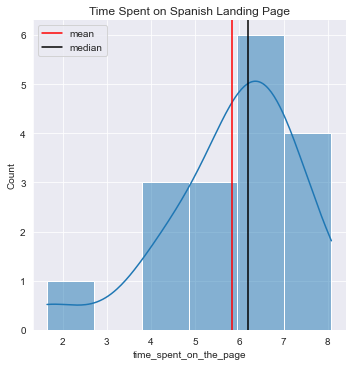

In [48]:
# Analysis on English language time spent on the page
data_eng = data_new[data_new['language_preferred']=='English']['time_spent_on_the_page']

# Create histogram
sns.displot(data_eng,kde=True)

# Display mean and median in the histogram
mean = data_eng.mean()
median = data_eng.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.title('Time Spent on English Landing Page')
plt.legend()
plt.show()

# Analysis on French language time spent on the page
data_fre = data_new[data_new['language_preferred']=='French']['time_spent_on_the_page']

# Create histogram
sns.displot(data_fre,kde=True)

# Display mean and median in the histogram
mean = data_fre.mean()
median = data_fre.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.title('Time Spent on French Landing Page')
plt.legend()
plt.show()

# Analysis on Spanish language time spent on the page
data_spa = data_new[data_new['language_preferred']=='Spanish']['time_spent_on_the_page']

# Create histogram
sns.displot(data_spa,kde=True)

# Display mean and median in the histogram
mean = data_spa.mean()
median = data_spa.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.title('Time Spent on Spanish Landing Page')
plt.legend()
plt.show()

- users on Spanish page spend less than 10 minutes
- the mean and median for English are close, indicating normal distribution
- the mean for French falls on the right on the median, indicating right left skewness
- the mean for Spanish falls on the left on the median, indicating slight left skewness

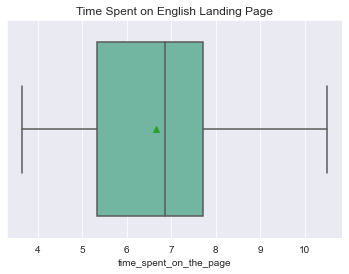

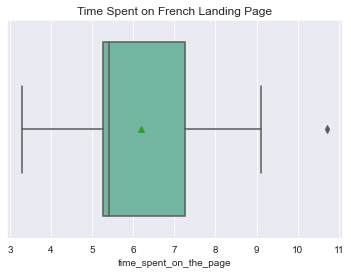

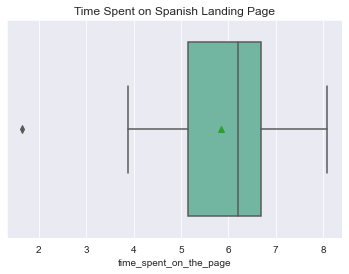

In [49]:
# Boxplot for English page
sns.boxplot(data_eng,showmeans=True,palette="Set2")
plt.title('Time Spent on English Landing Page')
plt.show()

# Boxplot for French page
sns.boxplot(data_fre,showmeans=True,palette="Set2")
plt.title('Time Spent on French Landing Page')
plt.show()

# Boxplot for Spanish page
sns.boxplot(data_spa,showmeans=True,palette="Set2")
plt.title('Time Spent on Spanish Landing Page')
plt.show()

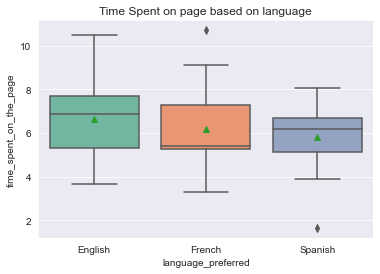

In [50]:
# draw the boxplot for visualization 
sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = data_new,showmeans=True,palette="Set2")
plt.title('Time Spent on page based on language')
plt.show()

- Few outliers on Spanish page and French age
- 75% of the users fall below 7.5 minutes for English and French pages
- 75% of the users fall below 7 minutes for Spanish page

### Let's perform a statistical test to check whether the mean time spent on the new page same for the different language users

In [51]:
# Let's check number od observations for each language
data_new['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

### Let's write the null and alternative hypothesis

Let $\mu_1$ be the means of time spent on English landing page,
$\mu_2$ be the means of time spent on French landing page and
$\mu_3$ be the means of time spent on Spanish landing page

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language time spent is different from the rest

### Let's test the normality using the Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [52]:
# Let's get the p-value for the normality test
w, p_value = stats.shapiro(data_new['time_spent_on_the_page']) 
print('The p-value is: ', p_value)

The p-value is:  0.8040016293525696


In [53]:
0.05<0.8040016293525696

True

Since p-value is higher than the significace level 0.05 we faile to reject the null hypothesis.
#### Conclusion: Time spent on the new page follows a normal distribution

### Let's test equality of variance using the Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [54]:
# Let's get the p-value for the equality of variance
statistic, p_value = stats.levene(data_eng, data_fre, data_spa)
# find the p-value
print('The p-value is: ', p_value)

The p-value is:  0.46711357711340173


In [55]:
0.05<0.46711357711340173

True

Since p-value is higher than the significace level 0.05 we fail to reject the null hypothesis.
#### Conclusion: All the population variances are equal

### Let's test whether the assumptions are satisfied or not

- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test
- Samples are independent simple random samples - Yes, samples are independent random samples
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test

We can use one way ANOVA F-Test

In [56]:
# Let's get the p-value for the ANOVA test
test_stat, p_value = stats.f_oneway(data_eng, data_fre, data_spa)
print('The p-value is: ', p_value)

The p-value is:  0.43204138694325955


In [57]:
0.05<0.43204138694325955

True

Since p-value is higher than the significace level 0.05 we fail to reject the null hypothesis.
## Conclusion: Mean time spent on the new pages is equal regardless of the language preference

After performing visual and statistical analysis we've come to following conclusions

# <span style="color:#008000"/>Conclusion

We looked at two groups and landing pages, 50 users each, and analyzed the conversion status based on the different aspects.

- The new landing page is more successful as compared to the old landing page
- Users spent more time on the new landing page as compared to the old landing page
- Overall higher number of users convert from the new landing page as compared to the old landing page
- The preferred language of the user has no significant impact on the mean time spent on the page
- The preferred language of the user has no significant impact on the status of their conversion